<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/ICA_independent_component_analysis_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICA independent Component Analysis in sklearn

https://notebook.community/663project/fastica_lz/Independent_Component_Analysis

### Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RAND=123

# import some data to play with
iris = datasets.load_iris()
X = iris.data

y = iris.target


X=np.hstack((X,10*np.random.random((y.shape[0], 3))))
X[:,6]=X[:,6]*X[:,0] +5*np.random.random((y.shape[0]))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


Baseline accuracy = 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_base)

Baseline accuracy =  0.9210526315789473


##  FastICA in scikit-learn
Kernel used for ICA.

fun{‘logcosh’, ‘exp’, ‘cube’} or callable,

 default=’logcosh’


In [11]:
from sklearn.decomposition import FastICA
sklearn_pca = FastICA(fun = 'cube', n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)


In [12]:
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("ICA cube features accuracy = ", scores_base)

ICA cube features accuracy =  0.8421052631578947


In [9]:

sklearn_pca = FastICA(fun = 'logcosh', n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)


In [10]:
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("logcosh-PCA features accuracy = ", scores_base)

logcosh-PCA features accuracy =  0.8421052631578947


## Loading scikit-learn's MNIST Hand-Written Dataset

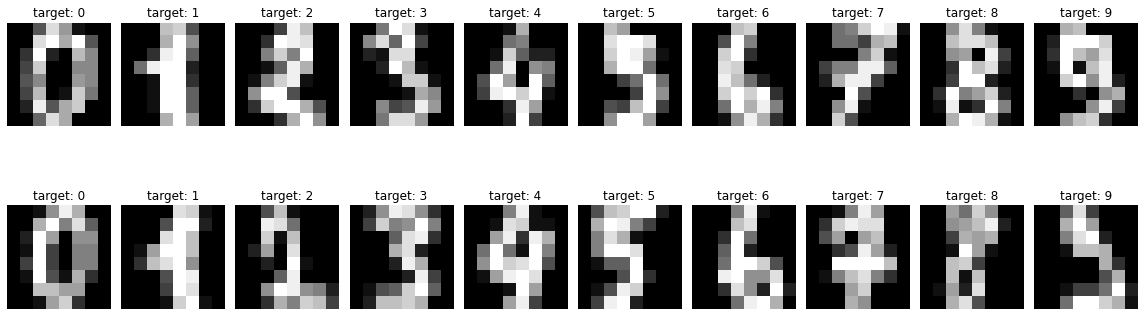

In [13]:
from sklearn.datasets import load_digits
mnist = load_digits()
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [14]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RAND)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X.shape)

(1797, 64)


In [15]:
nb_model = KNeighborsClassifier(n_neighbors=3, p=1)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_base=accuracy_score(y_test,y_pred)
print("Digits Baseline accuracy = ", scores_base)

Digits Baseline accuracy =  0.9644444444444444


In [23]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1, 36,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  1,  0],
       [ 2,  0,  0,  1,  0, 42,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 39,  2],
       [ 1,  0,  0,  2,  0,  0,  0,  1,  0, 38]])

In [16]:

sklearn_pca = FastICA(fun = 'logcosh', n_components=2)
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("Digits logcosh-ICA features accuracy = ", scores_base)

Digits poly-PCA features accuracy =  0.5133333333333333


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 (-0.0483038995597461, 0.0596279884392886),
 (-0.05507542733058855, 0.05725556565895602))

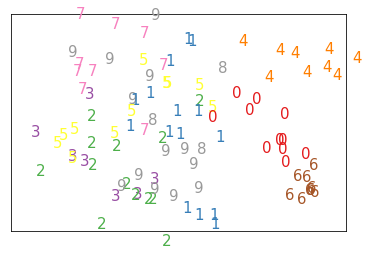

In [17]:
for i in range(np.min([X_train_pca.shape[0], 100])):
        plt.text(X_train_pca[i, 0], X_train_pca[i, 1], str(y_train[i]), 
                 color=plt.cm.Set1(y_train[i]), 
                 fontdict={'size': 15})
#plt.autoscale(enable=True, axis='both', tight=None)       
plt.xticks([]), plt.yticks([]), plt.ylim([np.min(X_train_pca[:100, 0]),np.max(X_train_pca[:100, 0])]), plt.xlim([np.min(X_train_pca[:100, 1]),np.max(X_train_pca[:100, 1])])        

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tole

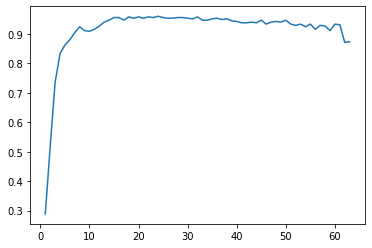

In [27]:
scores=[]
for i in range(1,64):
  sklearn_pca = FastICA(fun = 'cube',n_components=i)
  sklearn_pca.fit(X_train)
  X_train_pca = sklearn_pca.transform(X_train)
  X_test_pca  = sklearn_pca.transform(X_test)
  nb_model.fit(X_train_pca, y_train)
  y_pred = nb_model.predict(X_test_pca)
  scores_base=accuracy_score(y_test,y_pred)
  scores.append(scores_base)

plt.plot(range(1,64), scores)
k=np.argmax(scores)

In [28]:
sklearn_pca = FastICA(fun = 'cube',n_components=np.argmax(scores))
sklearn_pca.fit(X_train)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
nb_model.fit(X_train_pca, y_train)
y_pred = nb_model.predict(X_test_pca)
scores_base=accuracy_score(y_test,y_pred)
print("ACC = ", scores_base)
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

ACC =  0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 43,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 39,  2],
       [ 0,  1,  0,  2,  0,  0,  0,  1,  0, 38]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


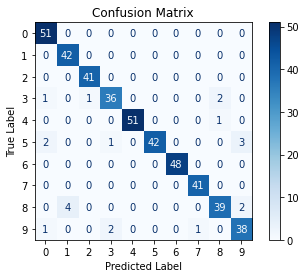

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(nb_model, X_test_pca, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()